In [1]:
%matplotlib inline

In [2]:
# difficult to tell the correct number of centroids.

In [12]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
blobs, classes = make_blobs(500, centers=3)

In [14]:
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [15]:
# Looking at Silhouette distance. It is the ratio of the
# difference between in-cluster dissimilarity, the closest
# out-of-cluster dissimilarity and the maximum of these
# two values. (The measure of how separate the clusters are)

In [16]:
from sklearn import metrics

In [17]:
silhouette_samples = metrics.silhouette_samples(blobs,
                                               kmean.labels_)

In [18]:
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[ 2.        ,  0.74893892],
       [ 2.        ,  0.78156808],
       [ 2.        ,  0.7728649 ],
       [ 0.        ,  0.80882898],
       [ 2.        ,  0.74871458]])

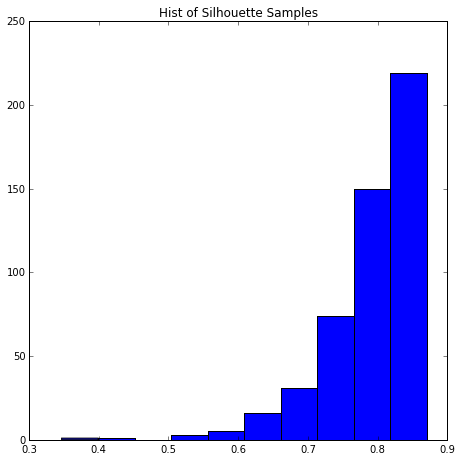

In [19]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.hist(silhouette_samples)
ax.set_title('Hist of Silhouette Samples')

In [20]:
# the average of silhouette coefficients is often used to
# describe the entire model's fit.

In [21]:
silhouette_samples.mean()

0.790784174912877

In [22]:
metrics.silhouette_score(blobs, kmean.labels_)

0.790784174912877

In [23]:
# fit the models of several cluster counts to see the average
# silhouette score.

In [24]:
blobs, classes = make_blobs(500, centers=10)

In [25]:
silhouette_avgs = []
for k in range(2, 60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    silhouette_avgs.append(metrics.silhouette_score(blobs,
                                                   kmean.labels_))

/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


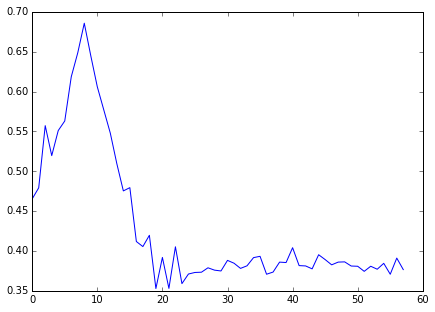

In [26]:
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)

In [28]:
''' This plot shows that the silhouette averages as the number of
centroids increased. It estimates that there were around 6 or
7 clusters ideally ( We know from the data creation process
that there were 3 clusters. )'''

' This plot shows that the silhouette averages as the number of\ncentroids increased. It estimates that there were around 6 or\n7 clusters ideally ( We know from the data creation process\nthat there were 3 clusters. )'